- https://github.com/NeuroExplorer/nex-Python-package
- https://www.neuroexplorer.com/docs/python_packages/nex5file_package.html
- https://github.com/NeuralEnsemble/python-neo/blob/master/neo/rawio/neuroexplorerrawio.py

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nelson_lab_to_nwb.interfaces.nex_interface import NeuroExplorerRecordingInterface
from pynwb import NWBHDF5IO, NWBFile

In [3]:
# file_path = "/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3_fromRawPlex.nex"
file_path = "/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3.nex5"
metadata_path = "/mnt/shared_storage/Github/nelson-lab-to-nwb/src/nelson_lab_to_nwb/creed_2024/metadata_example.yaml"

interface_recording = NeuroExplorerRecordingInterface(
    file_path=file_path,
    metadata_path=metadata_path,
    verbose=False
)

metadata = interface_recording.get_metadata()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf4 in position 1: invalid continuation byte

In [ ]:
print(metadata)

In [ ]:
interface_recording.run_conversion(
    nwbfile_path="test2.nwb",
    metadata=metadata,
    write_as="lfp",
    overwrite=True
)

In [ ]:
io = NWBHDF5IO("test2.nwb", 'r', load_namespaces=True)
nwbfile = io.read()
nwbfile

In [ ]:
nwbfile.electrodes[:]

In [ ]:
io.close()

In [ ]:
from datetime import datetime
from dateutil import tz
from pathlib import Path
from neuroconv.datainterfaces import PlexonRecordingInterface, PlexonSortingInterface
from neuroconv import NWBConverter


class NelsonPlexonNWBConverter(NWBConverter):
    data_interface_classes = dict(
        PlexonRecording=PlexonRecordingInterface,
        PlexonSorting=PlexonSortingInterface
    )

In [ ]:
# Change the file_path to the location in your system
file_path = "/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3-01.plx"

# Instantiate the data interface
interface_recording = PlexonRecordingInterface(file_path=file_path, verbose=False)

# Extract what metadata we can from the source files
metadata = interface_recording.get_metadata()

# Update relevant metadata info
session_start_time = datetime(2020, 1, 1, 12, 30, 0, tzinfo=tz.gettz("US/Pacific"))
metadata["NWBFile"].update(session_start_time=session_start_time)

# Choose a path for saving the nwb file and run the conversion
# nwbfile_path = f"{path_to_save_nwbfile}"
# interface.run_conversion(nwbfile_path=nwbfile_path, metadata=metadata)

In [ ]:
e = interface_recording.recording_extractor

In [ ]:
e

In [ ]:
from spikeinterface.extractors import PlexonRecordingExtractor
from spikeinterface.extractors.neoextractors.neuroexplorer import NeuroExplorerRecordingExtractor

In [ ]:
PlexonRecordingExtractor.get_streams(file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3.plx")

In [ ]:
# Very slow
rec_plexon = PlexonRecordingExtractor(
    file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3.plx",
    stream_name='Signals 0'
)
rec_plexon

In [ ]:
rec_plexon

In [ ]:
rec_plexon.get_channel_ids()

In [ ]:
streams = NeuroExplorerRecordingExtractor.get_streams(file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3_fromRawPlex.nex")
print(streams)

In [ ]:
# Fast
file_path = "/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3_fromRawPlex.nex"
recording = NeuroExplorerRecordingExtractor(
    file_path=file_path, 
    stream_name="AD02",
    all_annotations=True
)
recording

In [ ]:
r = recording.neo_reader
recording.get_time_info()

In [ ]:
recording.get_annotation_keys()

In [ ]:
from spikeinterface.extractors.neoextractors.neuroexplorer import NeuroExplorerRecordingExtractor
from spikeinterface.core import aggregate_channels

In [ ]:
file_path = f"/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3-01.nex"

streams = NeuroExplorerRecordingExtractor.get_streams(file_path=file_path)
stream_names = streams[0]
stream_names
# your_signal_stream_name = "AD"

# recording_list = [NeuroExplorerRecordingExtractor(file_path=file_path, stream_name=stream_name) for stream_name in stream_names]
# recording = aggregate_channels(recording_list)

In [ ]:
recording = NeuroExplorerRecordingExtractor(
    file_path="/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3-01.plx", 
    stream_name="AD01",
)

In [ ]:
recording

In [ ]:
# interface_sorting = PlexonSortingInterface(file_path=file_path, verbose=False)

In [ ]:
from spikeinterface.extractors import read_neuroexplorer

In [ ]:
ner = read_neuroexplorer(file_path=file_path, stream_name="AD01",)

# Nex

In [12]:
import nex.nexfile
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# file_path = "/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3_fromRawPlex.nex"
file_path = "/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3.nex5"

reader = nex.nexfile.Reader()
data = reader.ReadNexFile(file_path)
data['FileHeader']

{'MagicNumber': 894977358,
 'NexFileVersion': 501,
 'Comment': 'D1-Cre, 6OHDA in left MFB, 32Ch +DIO-ChR1 in left DLS.\r\nDOB: 2/19/15. L-dopa (5mg/kg) at 30 mins.\r\n4000 light pulses 0.5,1,2,4m',
 'Frequency': 40000.0,
 'Beg': 0.0,
 'NumVars': 197,
 'MetaOffset': 2569513860,
 'End': 11810.0967}

In [30]:
print(len(data['Variables']))
data['Variables'][170]

# for i in range(0, 197):
#     print(data['Variables'][i]['Header']['SamplingRate'])

197


{'Header': {'Type': 3,
  'Version': 500,
  'Name': 'sig016U_template',
  'DataOffset': 2569514476,
  'Count': 1,
  'TsDataType': 0,
  'ContDataType': 0,
  'SamplingRate': 40000.0,
  'Units': '',
  'ADtoMV': 7.32421875e-05,
  'MVOffset': 0.0,
  'NPointsWave': 56,
  'PreThrTime': 0.0,
  'MarkerDataType': 0,
  'NMarkers': 0,
  'MarkerLength': 0,
  'ContFragIndexType': 0},
 'Timestamps': array([45877.54325]),
 'WaveformValues': array([[0.64489746, 1.08984375, 0.63984375, 1.97717285, 0.90754395,
         0.97851562, 0.64372559, 0.19072266, 0.16940918, 0.63815918,
         2.14570312, 1.84562988, 0.64489746, 1.08984375, 0.18984375,
         0.16940918, 2.30690918, 0.16948242, 0.16940918, 0.63815918,
         1.97746582, 1.90209961, 2.19946289, 1.8454834 , 2.14489746,
         0.60249023, 0.60424805, 0.19123535, 0.16940918, 2.34440918,
         0.19072266, 0.16940918, 0.63815918, 2.07106934, 2.18269043,
         2.19946289, 1.8454834 , 2.14489746, 0.60249023, 0.60424805,
         0.19101562, 

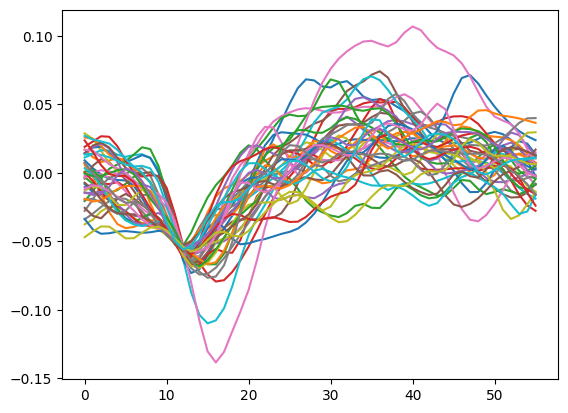

In [27]:
plt.plot(data['Variables'][90]['WaveformValues'][0:40].T)

In [ ]:
for i in range(31):
    print(data['Variables'][i]['Header']['Name'])

In [ ]:
data['Variables'][7]

In [ ]:
np.diff(data['Variables'][11]['Timestamps'])

In [ ]:
data

In [ ]:
data = reader.ReadNexFile("/media/luiz/Seagate Basic/storage/catalystneuro/nelson_lab/Raw_Plexon_ephys_LIDpaper/mr150417a3-02.nex")
data['FileHeader']

In [ ]:
for i in range(65):
    print(data['Variables'][i]['Header']['Name'])